# Budget Analysis

---

## Environment Setup

In [24]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [25]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [27]:
# Set environment variables from the .env file
load_dotenv()

True

In [28]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [30]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [31]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [32]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


#Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-a159b09b-2605-4d56-ae21-69bae58cd7b2', 'request_id': 'omG6hQYAyy17OI3'}


### 3. Exchange the public token for an access token

In [33]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
print(exchange_response['access_token'])

access-sandbox-b4b0fcc6-fec3-4aeb-91f8-9594b2cb38b1


In [34]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [35]:
# Retrieve accounts
# Extract Transactions with date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)



# Print accounts
print(transactions_response["accounts"])

[{'account_id': 'dVjxN6QMnqipqQq5gmlBTkWZwMAkvMHZ4qR7z', 'balances': {'available': 100, 'current': 110, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '0000', 'name': 'Plaid Checking', 'official_name': 'Plaid Gold Standard 0% Interest Checking', 'subtype': 'checking', 'type': 'depository'}, {'account_id': 'aV4zPbj6WwiajMjEwBdGs374J5G3p5t7gvDr5', 'balances': {'available': 200, 'current': 210, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '1111', 'name': 'Plaid Saving', 'official_name': 'Plaid Silver Standard 0.1% Interest Saving', 'subtype': 'savings', 'type': 'depository'}, {'account_id': '48B9p5lneXFJqzq6bBovS4QJWRr4ARcdaKLBy', 'balances': {'available': None, 'current': 1000, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '2222', 'name': 'Plaid CD', 'official_name': 'Plaid Bronze Standard 0.2% Interest CD', 'subtype': 'cd', 'type': 'depository'}, {'account_id': 'N1moMD

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [36]:
# Retrieve accounts
# Extract Transactions with date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)



# Print accounts
print(transactions_response["accounts"])


[{'account_id': 'dVjxN6QMnqipqQq5gmlBTkWZwMAkvMHZ4qR7z', 'balances': {'available': 100, 'current': 110, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '0000', 'name': 'Plaid Checking', 'official_name': 'Plaid Gold Standard 0% Interest Checking', 'subtype': 'checking', 'type': 'depository'}, {'account_id': 'aV4zPbj6WwiajMjEwBdGs374J5G3p5t7gvDr5', 'balances': {'available': 200, 'current': 210, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '1111', 'name': 'Plaid Saving', 'official_name': 'Plaid Silver Standard 0.1% Interest Saving', 'subtype': 'savings', 'type': 'depository'}, {'account_id': '48B9p5lneXFJqzq6bBovS4QJWRr4ARcdaKLBy', 'balances': {'available': None, 'current': 1000, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '2222', 'name': 'Plaid CD', 'official_name': 'Plaid Bronze Standard 0.2% Interest CD', 'subtype': 'cd', 'type': 'depository'}, {'account_id': 'N1moMD

### 2. Print the categories for each transaction

In [37]:
# Create a for-loop to print the categories for each transaction
for transactions in transactions_response['transactions']:
    print(json.dumps(transactions['category'][0], indent=4, sort_keys=True))
        

"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

# *I used my own code to create the dataframe*


In [14]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
#transactions_df= pd. DataFrame(columns = ["date","name", "amount","category"]) 
# Retrieve all the transactions
#transactions= transactions_response['transactions']

# Populate the transactions DataFrame with the transactions data
#transactions_df=pd.DataFrame(transactions)[["date","name", "amount","category"]]

# Display sample data from the DataFrame    
#transactions_df.head()

In [38]:
list2=[[]]
for transactions in transactions_response['transactions']:
    list2.append([transactions['date'],transactions['name'],transactions['amount'],transactions['category'][0]])
transactions_df= pd.DataFrame(list2)      
transactions_df.dropna(inplace=True)
transactions_df.columns=["date","name", "amount","category"]
transactions_df.head()

,date,name,amount,category
1,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2,2020-05-15,Uber,5.4,Travel
3,2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
4,2020-05-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
5,2020-05-13,Touchstone Climbing,78.5,Recreation


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [39]:
transactions_df['name'] = transactions_df['name'].astype('str')
transactions_df['category'] = transactions_df['category'].astype('str')
transactions_df['date']= transactions_df['date'].astype('datetime64[ns]')


transactions_df.set_index("date")

,name,amount,category
date,,,
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-05-15,Uber,5.40,Travel
2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-05-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-05-13,Touchstone Climbing,78.50,Recreation
2020-05-13,United Airlines,-500.00,Travel
2020-05-12,McDonald's,12.00,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-11,SparkFun,89.40,Food and Drink


In [40]:
# Display data types
transactions_df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [18]:
# Make any required data type transformation


In [41]:
# Set the date column as index

transactions_df=transactions_df.set_index("date")

# Display sample data
transactions_df.head()

,name,amount,category
date,,,
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-05-15,Uber,5.4,Travel
2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2020-05-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-05-13,Touchstone Climbing,78.5,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [42]:
# Fetch de income data
transactions_response = client.Income.get(access_token)
# Print the income data
pretty_print_response(transactions_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 720,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "gZiOAxn3WU6OMtX"
}


In [43]:
# Determine the previous year's gross income and print the results
prec_yr_gross_income=transactions_response["income"]["last_year_income_before_tax"]
prec_yr_gross_income

7285

In [44]:
# Determine the current monthly income and print the results
cur_monthly_income=transactions_response["income"]["income_streams"][0]["monthly_income"]
cur_monthly_income

500

In [45]:
# Determine the projected yearly income and print the results
projected_yrl_income=transactions_response["income"]["projected_yearly_income"]
projected_yrl_income

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

In [46]:
transactions_df["category"].head()

date
2020-05-15       Payment
2020-05-15        Travel
2020-05-14      Transfer
2020-05-14      Transfer
2020-05-13    Recreation
Name: category, dtype: object

### Calculate the expenses per category

In [47]:
# Compute the total expenses per category
totals_by_category = transactions_df.groupby('category').sum()["amount"]


In [48]:
# Display the expenses per catefory
totals_by_category

category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

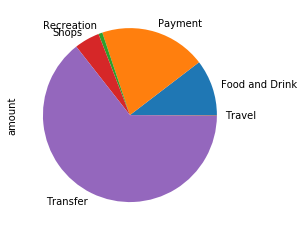

In [49]:
# Create a spending categories pie chart.
totals_by_category.plot.pie()

### Calculate the expenses per month

In [50]:
# Create a DataFrame with the total expenses
totals_by_month = transactions_df.groupby(transactions_df.index.month).sum()["amount"]
# Display sample data

totals_by_month

date
2     3584.83
3    11145.24
4    10645.24
5     6560.41
Name: amount, dtype: float64

Text(0, 0.5, 'Total Spend')

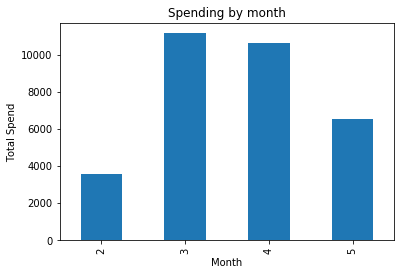

In [51]:
# Create a spending per month bar chart
#totals_by_month.plot.bar(x="Month",y="Spend")


ax = totals_by_month.plot(kind="bar", title='Spending by month')
ax.set_xlabel("Month")
ax.set_ylabel("Total Spend")